In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os
import subprocess


config_path = 'config.json'
output_path = 'coords.xyz'
distribution_path = 'distribution.txt'
energy_path = 'energy.txt'

/tmp/ipykernel_20850/1558781974.py:31: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_plot, interval=100)


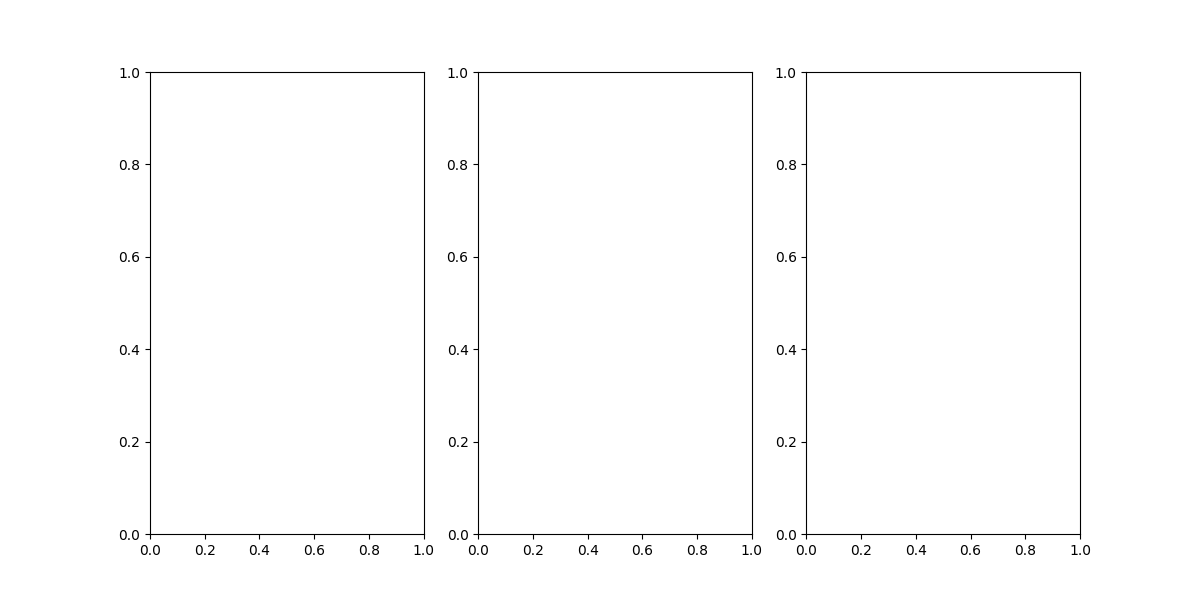

In [3]:
%matplotlib widget

subprocess.Popen(['build/main', config_path, output_path, distribution_path, energy_path])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

def update_plot(i):
    x = []
    with open(distribution_path, 'r') as f:
        lines = f.readlines()
        Ts = [np.mean([float(_)**2 for _ in line.split()])**0.5 for line in lines]

        for line in lines:
            for _ in line.split():
                x.append(float(_))
    
    axs[0].cla()
    axs[0].plot(range(len(Ts)), Ts / Ts[0], color='black')
    
    hist_, bin_edges = np.histogram(x, bins='auto', density=True)
    axs[1].cla()
    axs[1].stairs(np.log(hist_ / bin_edges[1:]**2), bin_edges**2, color='black')

    with open(energy_path, 'r') as f:
        energys = np.array([float(_) for _ in f.readlines()])
    
    axs[2].cla()
    axs[2].plot(range(len(energys)), energys / energys[0], color='black')


ani = animation.FuncAnimation(fig, update_plot, interval=100)
plt.show()

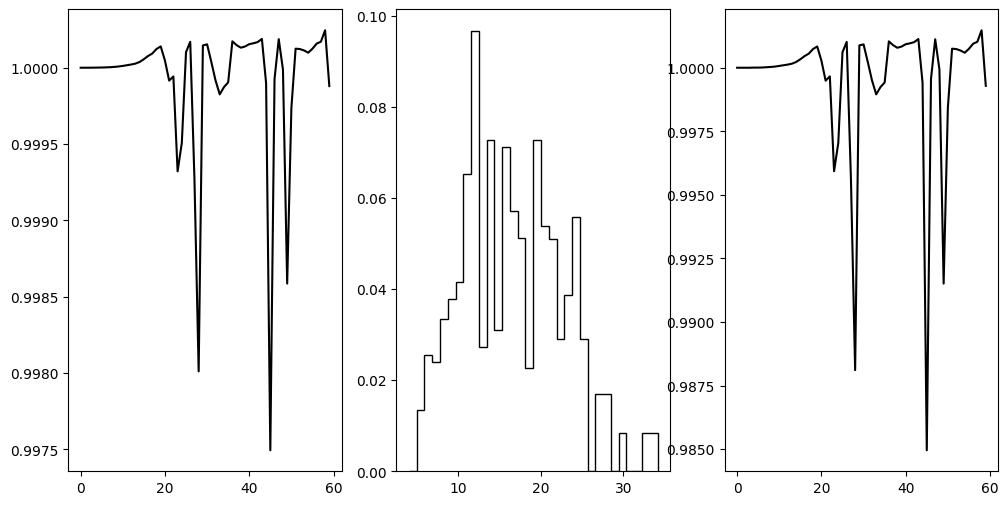

In [3]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# config_path = 'config.json'
# output_path = 'coords.xyz'
# distribution_path = 'distribution.txt'
# energy_path = 'energy.txt'

# x = []
# with open(distribution_path, 'r') as f:
#     lines = f.readlines()
#     Ts = [np.mean([float(_)**2 for _ in line.split()])**0.5 for line in lines]

#     for line in lines:
#         for _ in line.split():
#             x.append(float(_))

# axs[0].cla()
# axs[0].plot(range(len(Ts)), Ts / Ts[0], color='black')

# hist_, bin_edges = np.histogram(x, bins='auto', density=True)
# axs[1].cla()
# axs[1].stairs(hist_, bin_edges, color='black')

# with open(energy_path, 'r') as f:
#     energys = np.array([float(_) for _ in f.readlines()])

# axs[2].cla()
# axs[2].plot(range(len(energys)), energys / energys[0], color='black')